In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord

In [20]:
def show_pix(a, nside=2**11, matrix=False, one_colour=True):
    if matrix:
        a = a.reshape((a.shape[0] * a.shape[1]))
    m = np.zeros((hp.nside2npix(nside)), dtype=np.int32)
    i = 0
    for npix in a:
        vec = hp.pix2vec(nside=nside, ipix=npix, nest=True)
        ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(1), nest=True)
        m[ipix_disc] = 35
        if not one_colour:
            m[ipix_disc] += i
            i += 1
    hp.mollview(m, title="Mollview image NEST", nest=True)

In [27]:
def make_pic(center_pix, nside=2**11, size=64):
    def get_neighbours(npix, direction=None):
        theta, phi = hp.pix2ang(nside=nside, ipix=npix, nest=True)
        neighbours = hp.get_all_neighbours(nside=nside, theta=theta, phi=phi, nest=True)
        if direction is None:
            return neighbours
        dirs = ['sw', 'w', 'nw', 'n', 'ne', 'e', 'se', 's']
        return neighbours[dirs.index(direction)]
    
    ''' ~~~~~~~~~~> y 
      |  n __nw__ w
      |    |    |
    x | ne |    | sw
      |    |    |
      \/ e ~~se~~ s
         
    '''
    half = size // 2
    ans = np.ones((size, size), dtype=np.int32)
    ans *= -1
    ans[half - 1, half - 1] = center_pix
    for i in range(half - 2, -1, -1):
        ans[i, i] = get_neighbours(ans[i + 1, i + 1], 'n')
    for i in range(1, size):
        ans[i, 0] = get_neighbours(ans[i - 1, 0], 'se')
    for i in range(size):
        for j in range(1, size):
            if ans[i, j] == -1:
                ans[i, j] = get_neighbours(ans[i, j - 1], 'sw')
    return ans

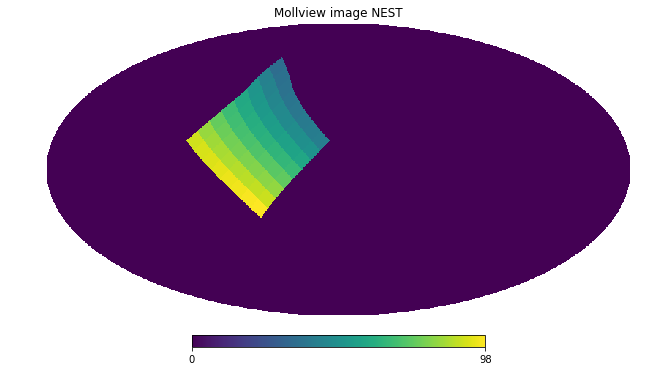

In [29]:
show_pix(make_pic(6, 2**3, 8), 2**3, True, False)